## Deep Learning and CNN

### Raw Pixels and Modelling

The following activities are performed as part of the Raw Pixels and Modelling task.

1] Loading the Preprocessed and Split Datasets

2] Modelling to Classify the Images

- Experiment 1: Building a model using SVM Classifier
 
- Experiment 2: Building a model using ANN Classifier

Note: Please run/execute the Assignment1_Image_Preprocessing.ipynb notebook first to generate the dataset file math_symbol_split_datasets.npz which is utilised in this modelling task.

In [34]:
# Importing packages for processing
import numpy as np
import pandas as pd

# Importing packages for svm classification and evaluation
from sklearn import svm 
from sklearn import metrics

# Importing package for LBP feature extraction from skimage library
from skimage import feature 

# Importing packages to load and display the images
import cv2

# Importing packages for ANN classification
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard

# Importing package for data disualisation and confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 1] Loading the Preprocessed and Split Datasets

In [35]:
# Loading the saved datasets file
math_symbol_datasets = np.load('math_symbol_split_datasets.npz')

# Accessing the datasets
X_train = math_symbol_datasets['X_train']
X_test = math_symbol_datasets['X_test']
Y_train = math_symbol_datasets['Y_train']
Y_test = math_symbol_datasets['Y_test']

# Closing the saved file after reading and loading 
math_symbol_datasets.close()

In [36]:
# Checking the shapes of training and testing datasets
print('After loading the preprocessed datasets below are their shapes:')
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

After loading the preprocessed datasets below are their shapes:
X_train shape: (3499, 45, 45)
Y_train shape: (3499,)
X_test shape: (1500, 45, 45)
Y_test shape: (1500,)


### 2] Modelling to Classify the Images

### Experiment 1: Building a model using SVM Classifier

#### SVM classifier with hyperparameters kernel='rbf', C=65.0

In [37]:
# Generating a 'svm_model1' instance of SVM classifire with its hyperparameters
svm_model1 = svm.SVC(kernel='rbf', C=65.0, random_state=19)

# Training the SVM classifier model using the HOG features of the training dataset
svm_model1.fit(X_train.reshape(X_train.shape[0], -1), Y_train)

SVC(C=65.0, random_state=19)

In [38]:
# Checking the accuray on the training dataset
print("Training dataset Accuracy: {:.4f}".format(svm_model1.score(X_train.reshape(X_train.shape[0], -1), Y_train)))

Training dataset Accuracy: 1.0000


#### Evaluating model with the testing dataset

In [39]:
# Predict labels using the trained SVM model
predicted_labels = svm_model1.predict(X_test.reshape(X_test.shape[0], -1))

In [40]:
# Checking the accuracy on the testing dataset
accuracy = metrics.accuracy_score(Y_test, predicted_labels)
print("Testing dataset Accuracy: {:.4f}".format(accuracy))

Testing dataset Accuracy: 0.9773


- The perfect accuracy on the training dataset suggests that the model has learned the training data too well, capturing noise and specific details that are unique to the training samples. 

- While the testing dataset accuracy is high with 97.73%, it's slightly lower than the training dataset accuracy. This performance gap is indicative of some level of overfitting. The model may have learned to classify the training data too precisely, making it less adaptable to new, unseen samples.

- Overall, overfitting occurs when a model learns to capture noise or irrelevant details from the training data, rather than learning the underlying patterns that generalize well to new data.

[[151   0   0   0   0   0   1   0   0   0]
 [  0 147   0   0   3   0   4   0   2   1]
 [  0   0 151   3   0   0   1   1   0   0]
 [  0   1   0 152   1   0   0   0   0   0]
 [  0   1   0   0 129   1   4   0   0   2]
 [  0   0   0   0   0 156   2   0   0   0]
 [  0   2   0   0   0   1 125   0   0   0]
 [  0   0   0   0   0   0   1 158   0   0]
 [  0   0   0   0   0   0   0   0 145   0]
 [  0   0   0   0   2   0   0   0   0 152]]


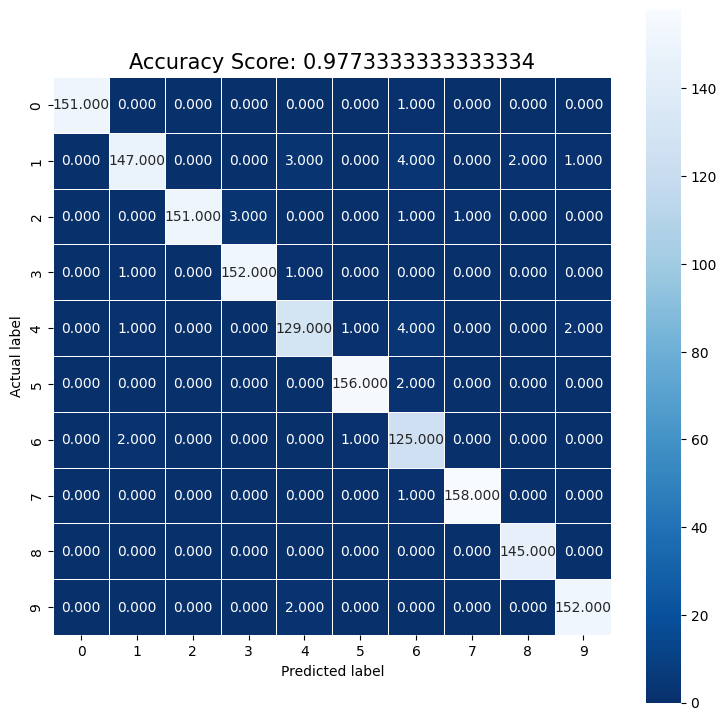

In [41]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predicted_labels)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

- The class 1 representing "leq" sybmol, is misclassified as class 6 (alpha) in 4 instances and class 8 (closed_bracket) in 2 instances, class 4 (sum) in 3 instances. These misidentifications may be due to "less than or equal to" symbol may resemblance to symbols such as the "alpha", "closed_bracket" and "sum" symbols in certain orientations or graphical representations, causing the classifier to misclassify them.

- Similarly, class 4 describing "" symbol, is misclassified as class 6 (alpha) in 4 instances, class 9 (squared_bracket) in 2 instances, class 1 (leq) and class 5 (theta) each in 1 instance. The summation symbol may have visual similarities with symbols like the "less than or equal to", "alpha" and "squared_bracket"  in certain orientations or graphical styles, causing the classifier to misclassify them.

- Overall, this SVM model with raw pixels showed misclassifications for all classes except class 8 (closed_bracket) due to the shared visual features in the representations of the symbols, making it challenging for the classifier to accurately differentiate between them.

In [42]:
# Creating the list with unique label names representing the math symbols
labelNames = ["pm", "leq", "minus", "sqrt", "sum", "theta", "alpha", "tan", "closed_bracket", "squared_bracket"]

In [43]:
# Display some classification result on test samples
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
  # classify the clothing
  #histog = desc.LBPfeatures(X_test[i].astype(np.uint8))
  #X_test[i].reshape(X_test[i].shape[0], -1)
  prediction = svm_model1.predict(X_test.reshape(X_test.shape[0], -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[Y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


leq


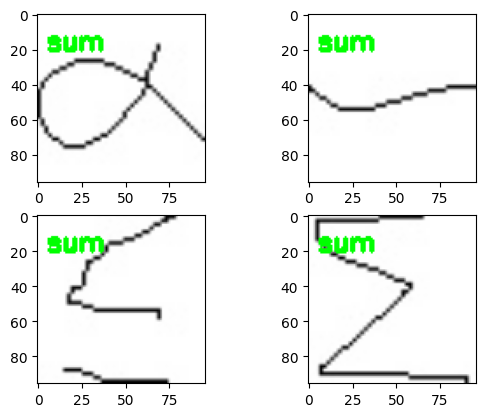

In [44]:
## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

### Experiment 2: Building a model using ANN Classifier

#### Exercise 2.1 (Keras Sequential Model with Adam optimiser)

In [45]:
# Set random seed for TensorFlow
tf.random.set_seed(19)

# Set random seed for NumPy (optional)
np.random.seed(19)

#### Designing a model framework

In [46]:
# Creating a ANN Sequential model with three Dense layers
ann_model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[45,45]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#### Visualising the model

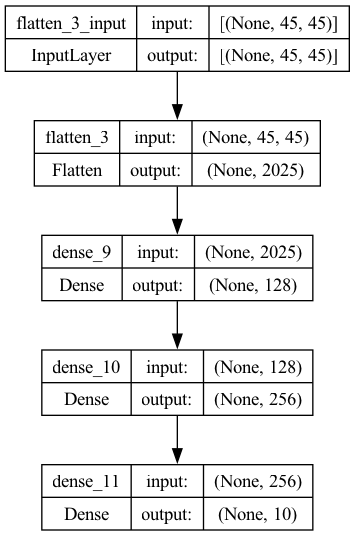

In [47]:
#Visualize Network Model
modelViz_file= 'ANN_Model1_RawPixels_Features.png' # Model filename

# Plot model
keras.utils.plot_model(ann_model1, to_file=modelViz_file, show_shapes=True)

In [48]:
# Displaying the summary of the model 
ann_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2025)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               259328    
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 294,922
Trainable params: 294,922
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compiling the ANN model with Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric
ann_model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the compiled ANN model on the training data for 10 epochs
H=ann_model1.fit(X_train, Y_train, epochs=10)

Epoch 1/10


110/110 [==============================] - 2s 7ms/step - loss: 2.3057 - accuracy: 0.1515
Epoch 2/10
110/110 [==============================] - 1s 6ms/step - loss: 1.7528 - accuracy: 0.3993
Epoch 3/10
110/110 [==============================] - 1s 5ms/step - loss: 1.1667 - accuracy: 0.6139
Epoch 4/10
110/110 [==============================] - 1s 5ms/step - loss: 0.8157 - accuracy: 0.7619
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 0.6015 - accuracy: 0.8331
Epoch 6/10
110/110 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.8485
Epoch 7/10
110/110 [==============================] - 1s 6ms/step - loss: 0.4456 - accuracy: 0.8725
Epoch 8/10
110/110 [==============================] - 1s 5ms/step - loss: 0.2910 - accuracy: 0.9211
Epoch 9/10
110/110 [==============================] - 1s 6ms/step - loss: 0.2509 - accuracy: 0.9323
Epoch 10/10
110/110 [==============================] - 1s 5ms/step - loss: 0.2257 - accuracy: 0.9386


In [50]:
# Displaying the keys helps to understand the structure of the training history and the available metrics
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


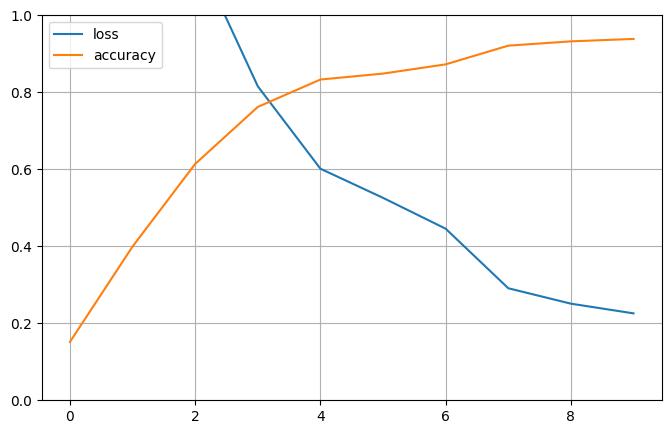

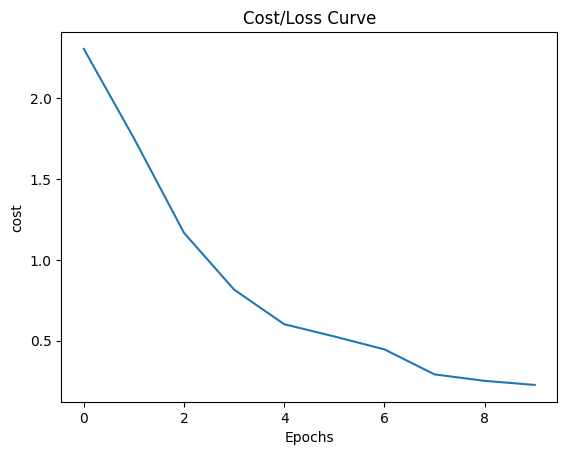

In [51]:
# Plot the learning curves
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [52]:
# Evaluating the model's performance on test dataset.
ann_model1.evaluate(X_test, Y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8913


[0.342742919921875, 0.8913333415985107]

- The model performed relatively well on the training dataset, achieving an accuracy of nearly 93.86%. This suggests that the model learned to classify the training samples quite effectively, capturing the patterns present in the raw pixel data.

- The testing dataset accuracy, while slightly lower than the training accuracy, is still reasonably high at approximately 89.13%. This indicates that the model generalized well to unseen data, while demonstrating a slight overfitting. 

- Overall, while the model's accuracy is relatively high, there is still room for refinement and optimization to further enhance its performance and generalization capabilities.

#### Exercise 2.1 (Keras Sequential Model with SDG Optimiser)

In [54]:
# Creating a 2nd ANN Sequential model with three Dense layers
ann_model2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[45,45]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


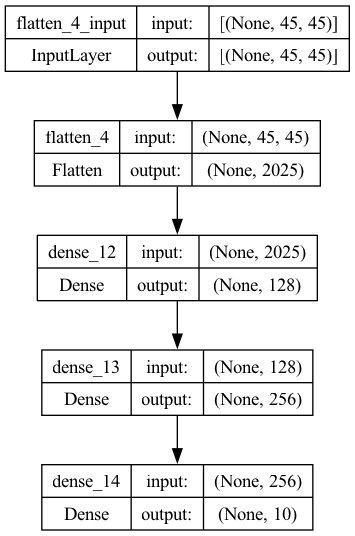

In [55]:
#Visualize Network Model
modelViz_file= 'ANN_Model2_RawPixels_Features.png' # Model filename

# Plot model
keras.utils.plot_model(ann_model2, to_file=modelViz_file, show_shapes=True)

In [56]:
# Displaying the summary of the model
ann_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2025)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               259328    
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 294,922
Trainable params: 294,922
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compiling the 2nd ANN model with SDG optimizer, sparse categorical cross-entropy loss function, and accuracy metric
ann_model2.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) ## add the required arguments


# Training the compiled ANN model on the training data for 10 epochs
H=ann_model2.fit(X_train, Y_train, epochs=10)

Epoch 1/10
110/110 [==============================] - 1s 2ms/step - loss: 2.2701 - accuracy: 0.1552
Epoch 2/10
110/110 [==============================] - 0s 3ms/step - loss: 2.0614 - accuracy: 0.2715
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 1.8722 - accuracy: 0.3447
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 1.6934 - accuracy: 0.4213
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 1.5094 - accuracy: 0.5101
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 1.3224 - accuracy: 0.5836
Epoch 7/10
110/110 [==============================] - 0s 3ms/step - loss: 1.2122 - accuracy: 0.6107
Epoch 8/10
110/110 [==============================] - 0s 4ms/step - loss: 1.0533 - accuracy: 0.6593
Epoch 9/10
110/110 [==============================] - 0s 4ms/step - loss: 1.0068 - accuracy: 0.6908
Epoch 10/10
110/110 [==============================] - 0s 3ms/step - loss: 0.8447 - accuracy: 0.7245

In [58]:
# Displaying the keys to helps understand the structure of the training history and the available metrics
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


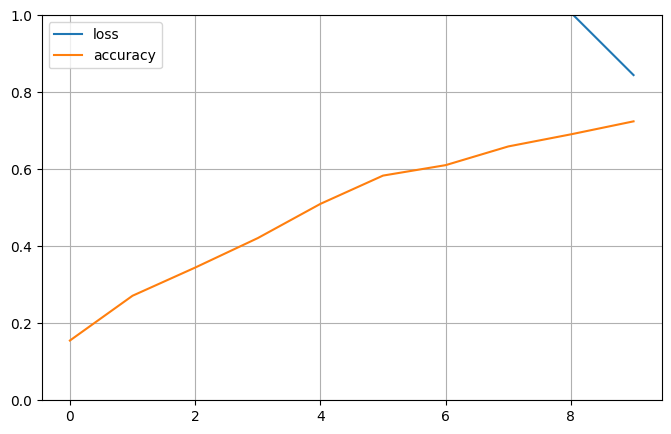

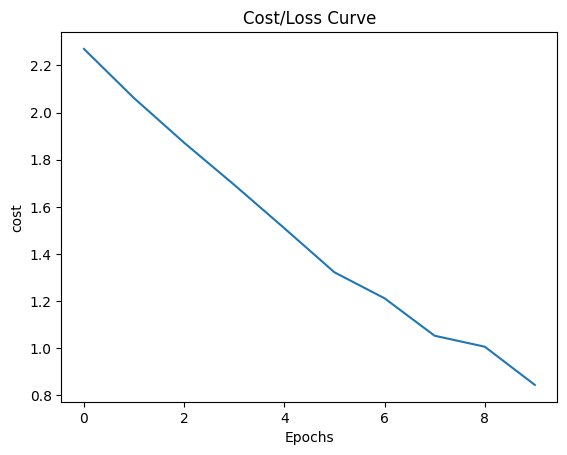

In [59]:
## Plot the learning curves
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [60]:
# Evaluating the model's performance on test dataset.
ann_model2.evaluate(X_test, Y_test)

47/47 [==============================] - 0s 4ms/step - loss: 1.8225 - accuracy: 0.3827


[1.8224736452102661, 0.382666677236557]

- Training dataset accuracy of 72.45% indicates that the model is able to correctly classify around 72.45% of the samples in the training data.

- While, the testing dataset accuracy of 38.27% suggests that the model's performance significantly drops when applied to unseen data.

- The provided accuracy scores suggest that the model's performance is quite poor, both on the training and testing datasets as compared to the 1st ANN model. Additionally, large discrepancy between training and testing accuracies indicates overfitting when the model learns to fit the training data too closely, capturing noise or random fluctuations that are specific to the training set but do not generalize well to new data.